# Lab 02. Image Augmentation 실습
---

# 1. Rotation

In [1]:
# Import modules
import cv2
import matplotlib.pylab as plt

415 704


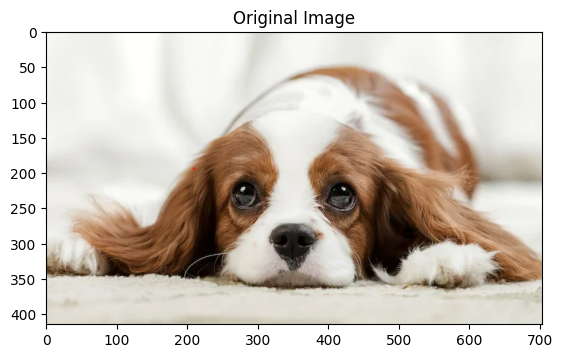

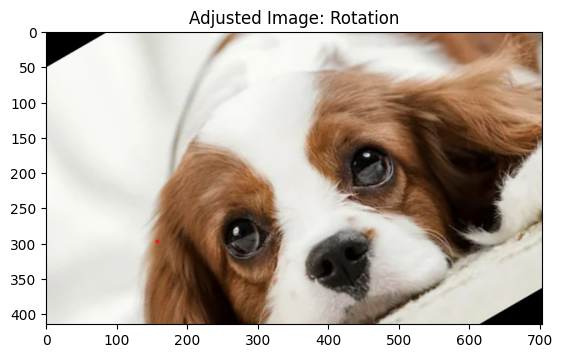

In [2]:
# Read images
image = cv2.imread('./data/dog.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Set an angle of rotation
angle = 30

# Generate e a rotation matrix based on image center point
h, w = image.shape[:2]
print(h, w)
center = (w //2, h //2)
M = cv2.getRotationMatrix2D(center,   # Center coordinates
                            angle,    # Degree of rotation
                            1.5)      # Resize ratio

# Rotate images
image_rotated = cv2.warpAffine(image,   # Original image data
                               M,       # Rotation matrix
                               (w, h))  # image size


# Visualization
plt.imshow(image)
plt.title('Original Image')
plt.show()

plt.imshow(image_rotated)
plt.title('Adjusted Image: Rotation')
plt.show()

# 2. Shift

In [3]:
# Import modules
import cv2
import matplotlib.pylab as plt
import numpy as np

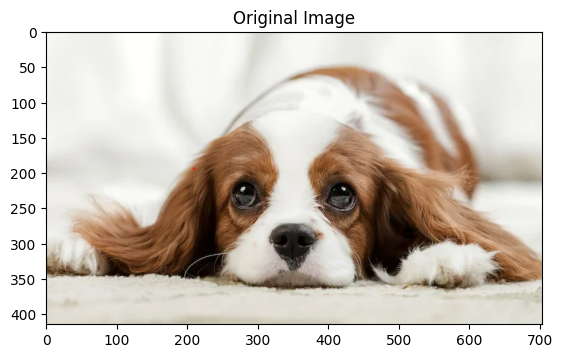

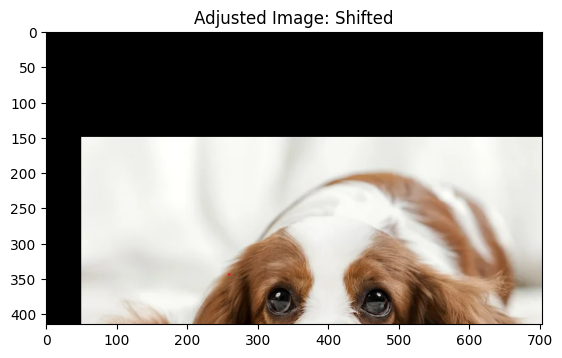

In [4]:
# Load images
image = cv2.imread('./data/dog.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Set coordinates for shift
shift = (50, 150)

# Generate a Shift Matrix
M = np.float32([[1, 0, shift[0]],
               [0, 1, shift[1]]])

# Shift images
image_shifted = cv2.warpAffine(image,
                              M,
                              (image.shape[1], image.shape[0]))


# Visualization
plt.imshow(image)
plt.title('Original Image')
plt.show()

plt.imshow(image_shifted)
plt.title('Adjusted Image: Shifted')
plt.show()

# 3. Zoom In / Out

In [5]:
# Import modules
import cv2
import matplotlib.pylab as plt
import numpy as np

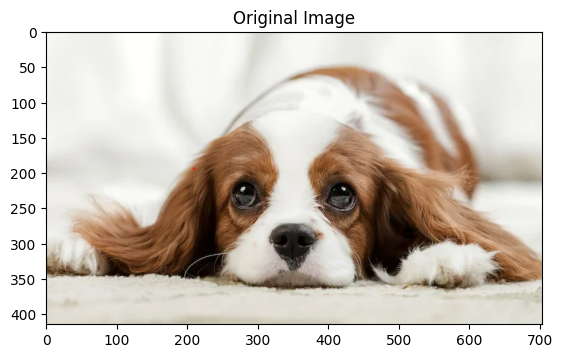

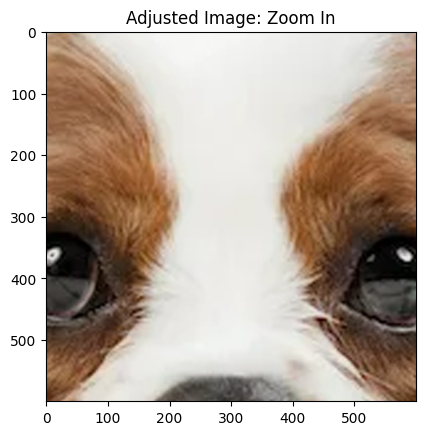

In [6]:
# Load images
image = cv2.imread('./data/dog.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Set image size
height, width = image.shape[:2]

# Set zoom scale
zoom_scale = 4
image_enlarged = cv2.resize(image,
                           (w * zoom_scale, h * zoom_scale),
                           interpolation=cv2.INTER_CUBIC)

center = [image_enlarged.shape[0] // 2,
         image_enlarged.shape[1] // 2]

cut_half = 300
image_focused = image_enlarged[center[0]-cut_half:center[0]+cut_half,
                               center[1]-cut_half:center[1] + cut_half]

# Visualization
plt.imshow(image)
plt.title('Original Image')
plt.show()

plt.imshow(image_focused)
plt.title('Adjusted Image: Zoom In')
plt.show()

# 4. Flip

In [7]:
# Import modules
import cv2
import matplotlib.pylab as plt
import numpy as np

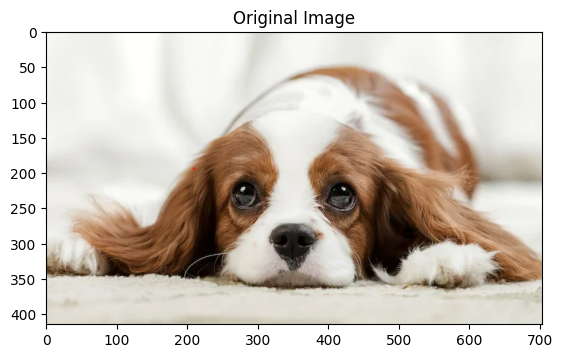

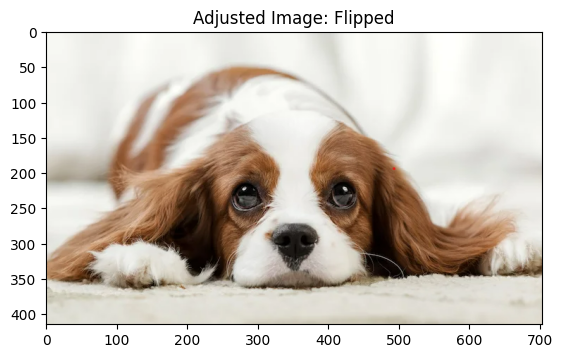

In [8]:
# Load images
image = cv2.imread('./data/dog.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Flip
image_flipped = cv2.flip(image, 1)  # '0': up-down, '1': left-right, '-1': up-down+left-right

# Visualization
plt.imshow(image)
plt.title('Original Image')
plt.show()

plt.imshow(image_flipped)
plt.title('Adjusted Image: Flipped')
plt.show()

# 5. Salt-and-Pepper Noise

In [9]:
# Import modules
import cv2
import matplotlib.pylab as plt
import numpy as np

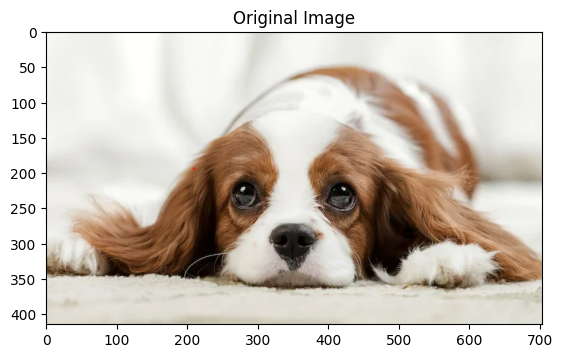

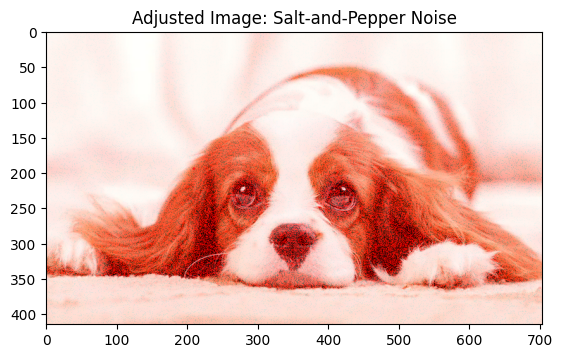

In [10]:
# Load images
image = cv2.imread('./data/dog.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Add Salt-and-Pepper Noise
noise = np.zeros(image.shape, np.uint8)  # noise: (width, height, color)
#print(noise)
cv2.randu(noise, 0, 255)

black = noise < 30
white = noise > 225

noise[black] = 0
noise[white] = 255


# Add noises to each color chanel
noise_b = noise[:, :, 0]  # '0': Red
noise_g = noise[:, :, 1]  # '1': Green
noise_r = noise[:, :, 2]  # '2': Red

image_noisy = cv2.merge([cv2.add(image[:, :, 0], noise_b),
                        cv2.add(image[:, :, 1], noise_g),
                        cv2.add(image[:, :, 2], noise_r)])

# Visualization
plt.imshow(image)
plt.title('Original Image')
plt.show()

plt.imshow(image_noisy)
plt.title('Adjusted Image: Salt-and-Pepper Noise')
plt.show()

# 6. Gaussian Noise

In [11]:
# Import modules
import cv2
import numpy as np

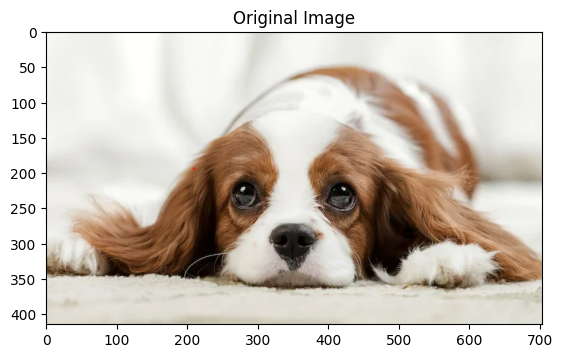

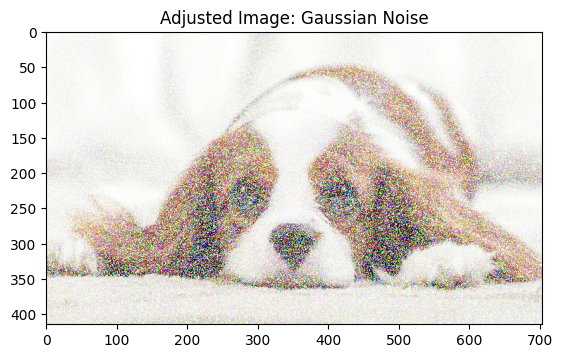

In [12]:
# Load images
image = cv2.imread('./data/dog.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Add Guassian Noise
mean = 0
var = 100
sigma = var ** 0.3
gaussian = np.random.normal(mean, sigma, image.shape)
gaussian = gaussian.reshape(image.shape).astype('uint8')
image_noisy = cv2.add(image, gaussian)

# Visualization
plt.imshow(image)
plt.title('Original Image')
plt.show()

plt.imshow(image_noisy)
plt.title('Adjusted Image: Gaussian Noise')
plt.show()

# 7. Hue Shifting

In [13]:
# Import modules
import cv2
import numpy as np
import matplotlib.pylab as plt

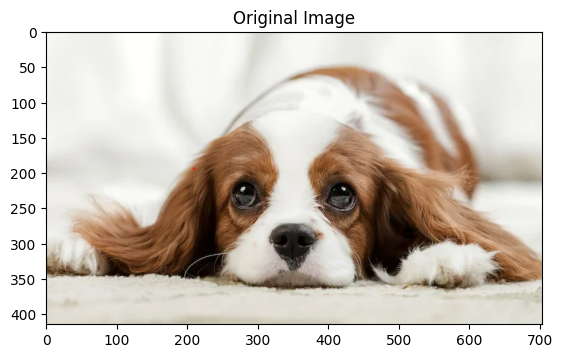

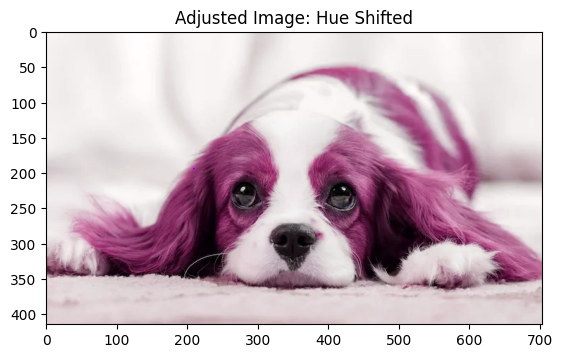

In [14]:
# Load images
image = cv2.imread('./data/dog.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Hue: Convert RGB -> HSV -> RGB
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Change Hue
hue_shift = 30
image_hsv[..., 0] = (image_hsv[:, :, 0] + hue_shift ) % 150

# Convert HSV -> BGR
image_bgr = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR)

# Visualization
plt.imshow(image)
plt.title('Original Image')
plt.show()

plt.imshow(image_bgr)
plt.title('Adjusted Image: Hue Shifted')
plt.show()

# 8. Color Transformation

In [15]:
# Import modules
import cv2
import numpy as np
import matplotlib.pylab as plt

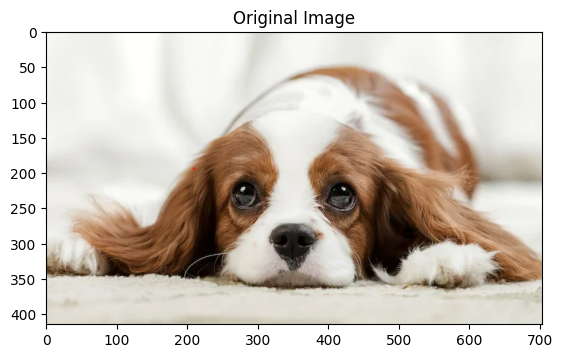

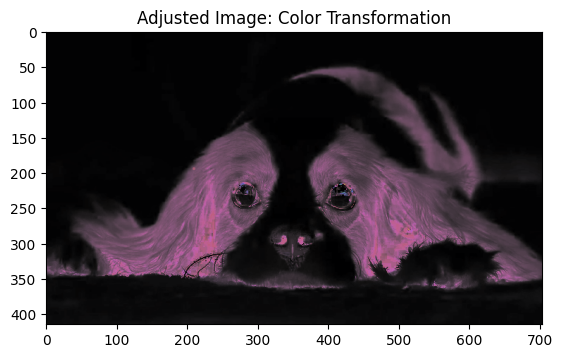

In [16]:
# Read images
image = cv2.imread('./data/dog.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Change HSV values
image_hsv[..., 0] += 50 # Hue
image_hsv[..., 1] = np.uint8(np.float32(image_hsv[..., 1] * 0.5))  # Saturation
image_hsv[..., 2] = np.uint8(np.float32(image_hsv[..., 1] * 1.5))  # Value

# Convert HSV to RGB
image_bgr = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR)
image_bgr = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Visualization
plt.imshow(image)
plt.title('Original Image')
plt.show()

plt.imshow(image_bgr)
plt.title('Adjusted Image: Color Transformation')
plt.show()

# 9. Crop Images

In [17]:
# Import modules
import cv2
import numpy as np
import matplotlib.pylab as plt

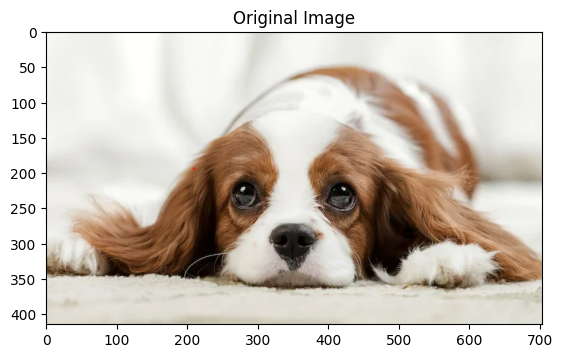

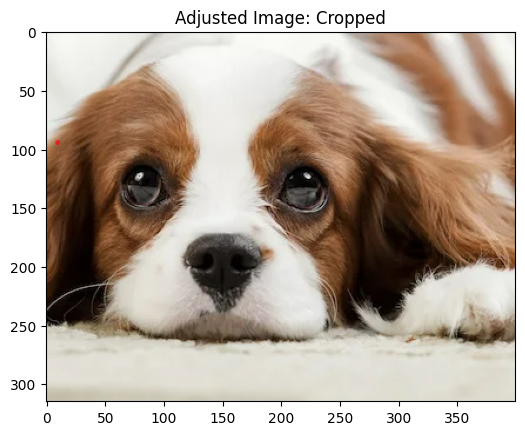

In [18]:
# Load images
image = cv2.imread('./data/dog.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Set coordinates to crop
x, y, w, h = 200,  100, 400, 500

# Crop
image_cropped = image[y: y+h, x: x+w]

# Visualization
plt.imshow(image)
plt.title('Original Image')
plt.show()

plt.imshow(image_cropped)
plt.title('Adjusted Image: Cropped')
plt.show()

# 10. `cv2.warpAffine()`

In [19]:
# Import modules
import cv2
import numpy as np

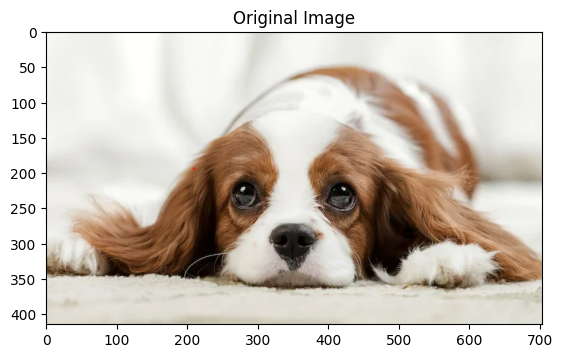

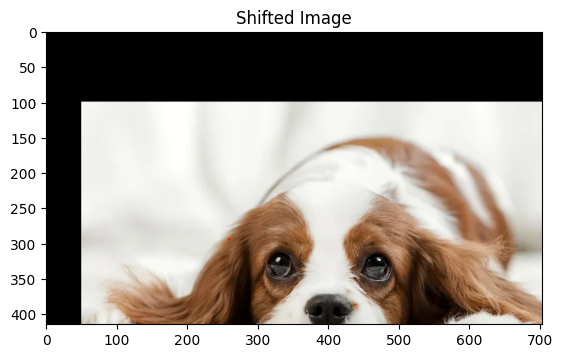

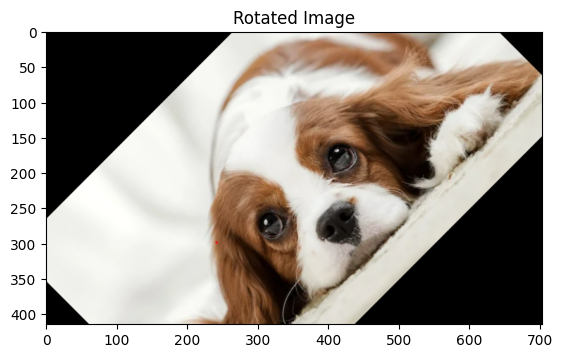

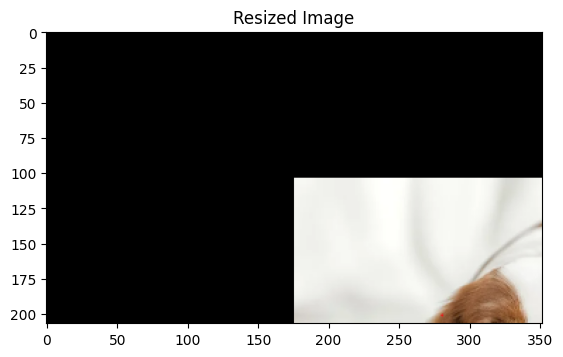

In [20]:
# Load images
image = cv2.imread('./data/dog.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Shift images
M = np.float32([[1, 0, 50], [0, 1, 100]])  # X-axis - 50, Y-axis - 100
image_shifted = cv2.warpAffine(image, M,
                               (image.shape[1], image.shape[0]))

# Rotate images
M = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2),
                            45,
                            1)
image_rotated = cv2.warpAffine(image,
                               M,
                               (image.shape[1], image.shape[0]))

# Zoom in/out
M = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2),
                            0,
                            0.5)
image_resized = cv2.warpAffine(image,
                               M,
                               (int(image.shape[1] * 0.5), int(image.shape[0] * 0.5)))

# Visualization
plt.imshow(image)
plt.title('Original Image')
plt.show()

plt.imshow(image_shifted)
plt.title('Shifted Image')
plt.show()

plt.imshow(image_rotated)
plt.title('Rotated Image')
plt.show()

plt.imshow(image_resized)
plt.title('Resized Image')
plt.show()

# 11. Gaussian Blur

In [21]:
# Import modules
import cv2
import matplotlib.pylab as plt

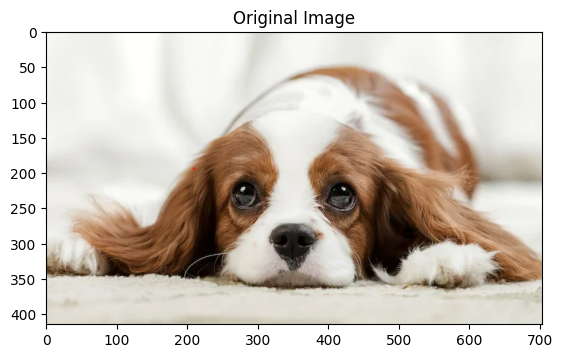

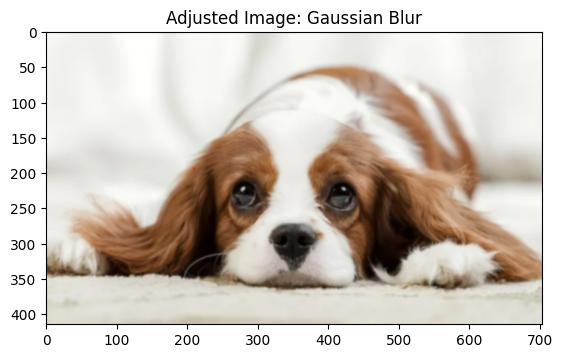

In [22]:
# Load images
image = cv2.imread('./data/dog.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# GaussianBlur
image_gaussian = cv2.GaussianBlur(image, (5, 5), 0)

# Visualization
plt.imshow(image)
plt.title('Original Image')
plt.show()

plt.imshow(image_gaussian)
plt.title('Adjusted Image: Gaussian Blur')
plt.show()

# 12. Adaptive Thresholding

In [23]:
# Import modules
import cv2
import matplotlib.pylab as plt

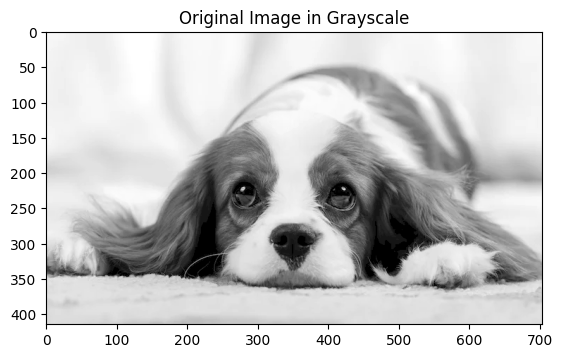

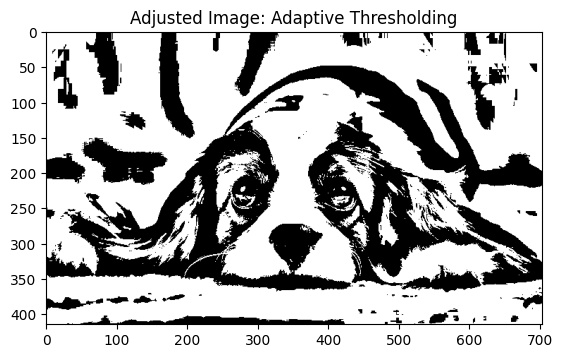

In [24]:
# Load images
image = cv2.imread('./data/dog.png', 0)
#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Set thresholding
image_thresh = cv2.adaptiveThreshold(image,
                                      255,  # Maximum value assigned to a pixel in the output binary image
                                      cv2.ADAPTIVE_THRESH_MEAN_C, # Use mean value of neighborhood pixels to calculate threshold value
                                      cv2.THRESH_BINARY,  # Higher than threshold set to 255(max value), otherwise set to 0
                                      55,  # Size of negibhor hoold to calcualte threshold value
                                      2)   # constant

# Visualizationa
plt.imshow(image, 'gray')
plt.title('Original Image in Grayscale')
plt.show()

plt.imshow(image_thresh, 'gray')
plt.title('Adjusted Image: Adaptive Thresholding')
plt.show()

# 13. Color Temperature

In [25]:
# Import modules
import cv2
import matplotlib.pylab as plt

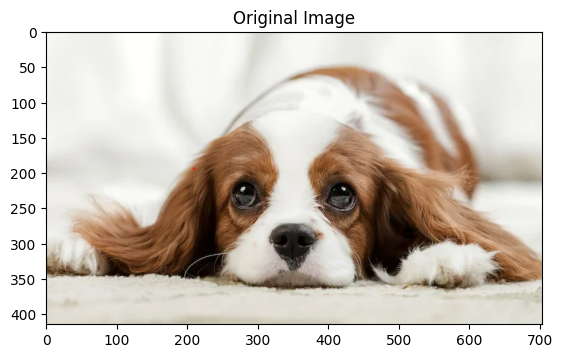

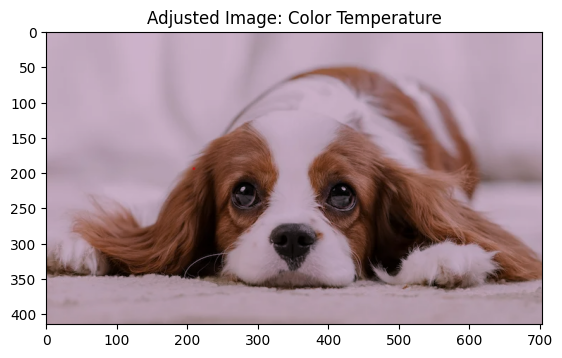

In [26]:
# Load images
image = cv2.imread('./data/dog.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Refine colors
balance = [0.8, 0.7, 0.8]

image_adjusted = image.copy()
for i in range(3):
    if balance[i] != 1.0:
        image_adjusted[..., i] = cv2.addWeighted(image_adjusted[..., i], 
                                                 balance[i], 
                                                 0, # Wieght
                                                 0, # Scalar value
                                                 0) # 

# Visualizationa
plt.imshow(image)
plt.title('Original Image')
plt.show()

plt.imshow(image_adjusted)
plt.title('Adjusted Image: Color Temperature')
plt.show()

# 14. Motion Blur

In [27]:
# Import modules
import cv2
import matplotlib.pylab as plt

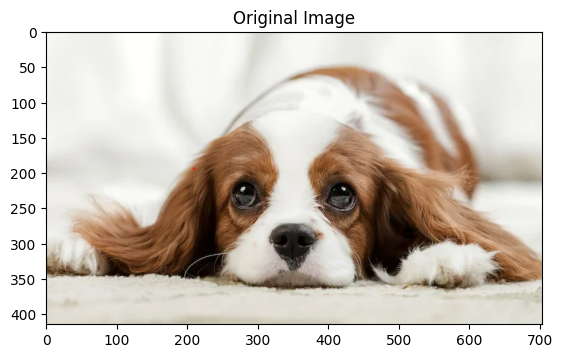

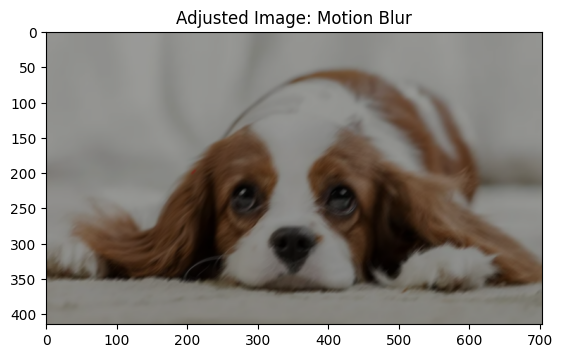

In [28]:
# Load images
image = cv2.imread('./data/dog.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


##################################
# Generate a kernel for Motion blur

# Set a kernel size
kernel_size = 15

# Create a kernel filled with '0'
kernel_direction = np.zeros((kernel_size, kernel_size))

# Fill the middle row with '1'
kernel_direction[int((kernel_size - 1) / 2), :] = np.ones(kernel_size)

# Normalize weights --> sum becomes '1'
kernel_direction /= kernel_size  

# Get a rotation matrix
kernel_matrix = cv2.getRotationMatrix2D((kernel_size / 2, kernel_size / 2), # Get a center point
                                        45,   # Degrees of rotation
                                        1)    # 
# Generate a kernel of 2x3 size -> the first part (2x2) + the second part (2x1)
kernel = np.hstack((kernel_matrix[:, :2], # 2x2
                    [[0], [0]]))          # 2x1

# Apply the kernel using warpAffine function
kernel = cv2.warpAffine(kernel_direction, 
                        kernel,
                       (kernel_size, kernel_size))

# Apply motion blur
image_motion_blur = cv2.filter2D(image, -1, kernel)
##################################


# Visualizationa
plt.imshow(image)
plt.title('Original Image')
plt.show()

plt.imshow(image_motion_blur)
plt.title('Adjusted Image: Motion Blur')
plt.show()

# 15. Random Noise

In [29]:
# Import modules
import cv2
import matplotlib.pylab as plt

415 704


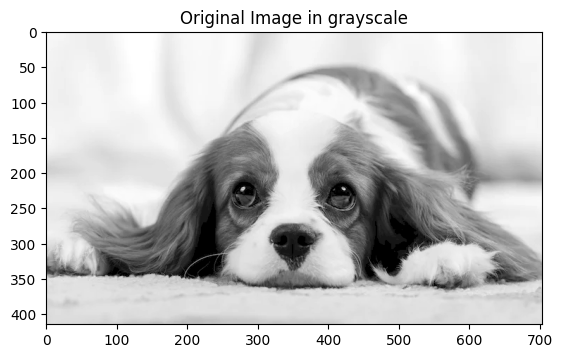

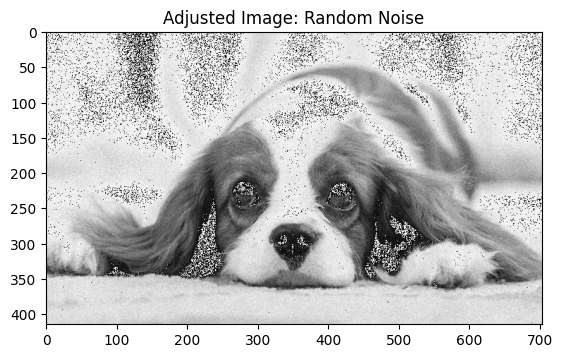

In [30]:
# Load images
image = cv2.imread('./data/dog.png', cv2.IMREAD_GRAYSCALE)

# Get size of images
height, width = image.shape
print(height, width)

# Set parameters
mean = 0
var = 100 # variance
sigma = var ** 0.5 # Std

# Generate noise
gaussian = np.random.normal(mean, sigma, (height, width))
gaussian = gaussian.reshape(height, width)
image_noisy = image + gaussian.astype(np.uint8)  # gaussian.astype(np.uint8): convert gaussian image to 'uint8' type

# Visualization
plt.imshow(image, 'gray')
plt.title('Original Image in grayscale')
plt.show()

plt.imshow(image_noisy, 'gray')
plt.title('Adjusted Image: Random Noise')
plt.show()

# 16. Saturation Adjustment

In [31]:
# Import modules
import cv2
import matplotlib.pylab as plt

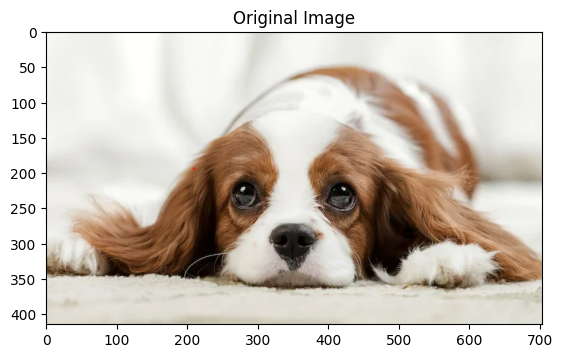

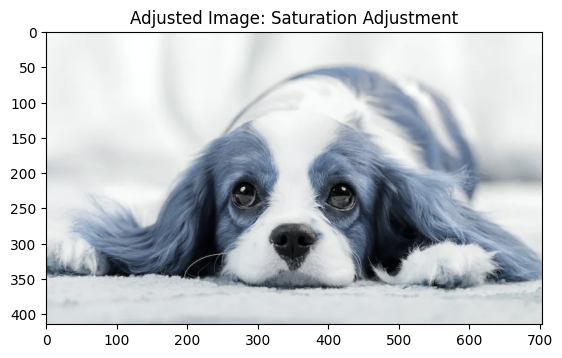

In [32]:
# Load images
image = cv2.imread('./data/dog.png')
#image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to HSV scale
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Increase saturation
saturation_factor = 0.5
image_hsv[:, :, 1] = image_hsv[:, :, 1] * saturation_factor  # '1': Saturation channel

# Convert to RGB
image_saturated = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)


# Visualization
plt.imshow(image)
plt.title('Original Image')
plt.show()

plt.imshow(image_saturated)
plt.title('Adjusted Image: Saturation Adjustment')
plt.show()

# 17. Brightness Adjustment

In [33]:
# Import modules
import cv2
import matplotlib.pylab as plt

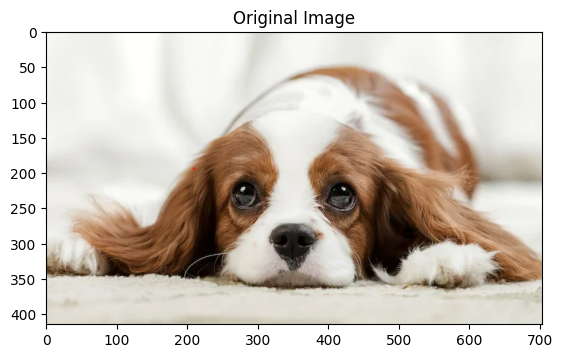

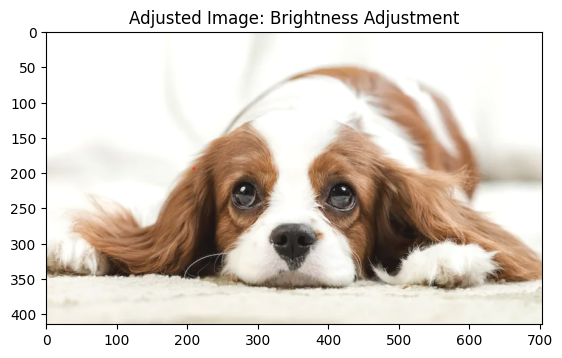

In [34]:
# Load images
image = cv2.imread('./data/dog.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Adjust brightness
brightness_offset = 20
image_brightened = cv2.convertScaleAbs(image,
                                      alpha = 1,  # Scale factor -> '1': no change
                                      beta = brightness_offset) # Offset factor

# Visualization
plt.imshow(image)
plt.title('Original Image')
plt.show()

plt.imshow(image_brightened)
plt.title('Adjusted Image: Brightness Adjustment')
plt.show()

# 18. Median Blur

In [35]:
# Import modules
import cv2
import matplotlib.pylab as plt

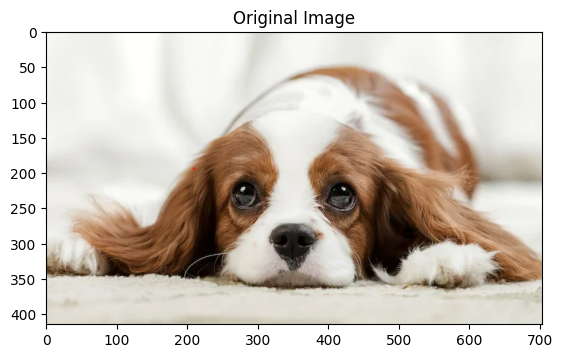

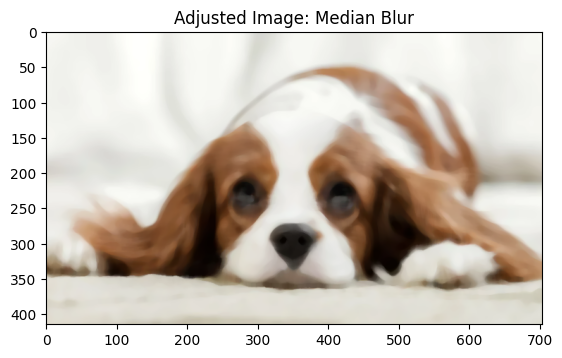

In [36]:
# Load images
image = cv2.imread('./data/dog.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Median Blur
image_filtered = cv2.medianBlur(image, 11)  # kernel size should be an Odd integer

# Visualization
plt.imshow(image)
plt.title('Original Image')
plt.show()

plt.imshow(image_filtered)
plt.title('Adjusted Image: Median Blur')
plt.show()

# 19. Histogram Equalization

In [37]:
# Import modules
import cv2
import matplotlib.pylab as plt

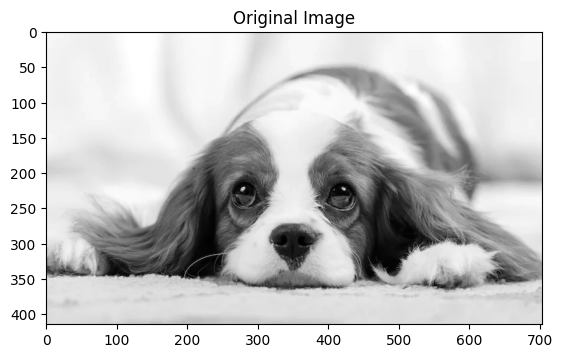

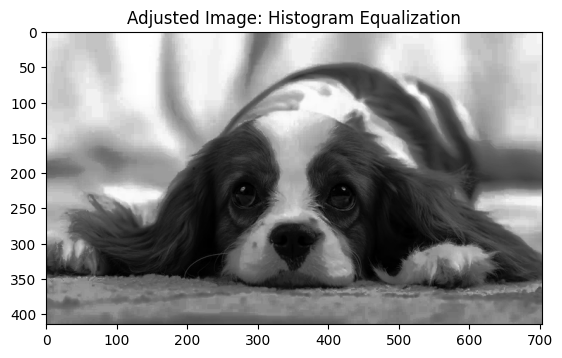

In [38]:
# Load images
image = cv2.imread('./data/dog.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Histogram Equalization: Only in grayscale
image_equalized = cv2.equalizeHist(image)

# Visualization
plt.imshow(image, 'gray')
plt.title('Original Image')
plt.show()

plt.imshow(image_equalized, 'gray')
plt.title('Adjusted Image: Histogram Equalization')
plt.show()